In [116]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
sns.set()

In [117]:
# loading the data set
ds_salaries = pd.read_csv("C:\\Users\\Adenle\\Desktop\\DS projects\\ds_salaries\\ds_salaries.csv")
ds_salaries.head(5)

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [118]:
len(ds_salaries)

607

In [119]:
ds_salaries.shape
print(f'no of columns: {ds_salaries.shape[0]}')
print(f'no of rows: {ds_salaries.shape[1]}')


no of columns: 607
no of rows: 12


In [120]:
ds_salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [121]:
#find for null values
ds_salaries.isnull().sum()
#there are no null values

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [122]:
ds_salaries.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,607.0,303.000000,1.753701e+02,0.0,151.5,303.0,454.5,606.0
work_year,607.0,2021.405272,6.921330e-01,2020.0,2021.0,2022.0,2022.0,2022.0
salary,607.0,324000.062603,1.544357e+06,4000.0,70000.0,115000.0,165000.0,30400000.0
salary_in_usd,607.0,112297.869852,7.095726e+04,2859.0,62726.0,101570.0,150000.0,600000.0
remote_ratio,607.0,70.922570,4.070913e+01,0.0,50.0,100.0,100.0,100.0


In [123]:
#find duplicates
df_salaries= ds_salaries.duplicated()
ds_salaries.loc[ds_salaries.duplicated()]


#there are no duplicates

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size


In [124]:
ds_salaries['job_title'].unique()

array(['Data Scientist', 'Machine Learning Scientist',
       'Big Data Engineer', 'Product Data Analyst',
       'Machine Learning Engineer', 'Data Analyst', 'Lead Data Scientist',
       'Business Data Analyst', 'Lead Data Engineer', 'Lead Data Analyst',
       'Data Engineer', 'Data Science Consultant', 'BI Data Analyst',
       'Director of Data Science', 'Research Scientist',
       'Machine Learning Manager', 'Data Engineering Manager',
       'Machine Learning Infrastructure Engineer', 'ML Engineer',
       'AI Scientist', 'Computer Vision Engineer',
       'Principal Data Scientist', 'Data Science Manager', 'Head of Data',
       '3D Computer Vision Researcher', 'Data Analytics Engineer',
       'Applied Data Scientist', 'Marketing Data Analyst',
       'Cloud Data Engineer', 'Financial Data Analyst',
       'Computer Vision Software Engineer',
       'Director of Data Engineering', 'Data Science Engineer',
       'Principal Data Engineer', 'Machine Learning Developer',
       

In [125]:
ds_salaries.shape

print(f'the no of columns: {ds_salaries.shape[0]}')
print(f'the no of columns: {ds_salaries.shape[1]}')

the no of columns: 607
the no of columns: 12


In [126]:
ds_salaries = ds_salaries.drop('Unnamed: 0',axis=1)
ds_salaries

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


In [127]:
ds_salaries['company_location'].unique()

array(['DE', 'JP', 'GB', 'HN', 'US', 'HU', 'NZ', 'FR', 'IN', 'PK', 'CN',
       'GR', 'AE', 'NL', 'MX', 'CA', 'AT', 'NG', 'ES', 'PT', 'DK', 'IT',
       'HR', 'LU', 'PL', 'SG', 'RO', 'IQ', 'BR', 'BE', 'UA', 'IL', 'RU',
       'MT', 'CL', 'IR', 'CO', 'MD', 'KE', 'SI', 'CH', 'VN', 'AS', 'TR',
       'CZ', 'DZ', 'EE', 'MY', 'AU', 'IE'], dtype=object)

In [128]:
ds_salaries.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
work_year,607.0,2021.405272,6.921330e-01,2020.0,2021.0,2022.0,2022.0,2022.0
salary,607.0,324000.062603,1.544357e+06,4000.0,70000.0,115000.0,165000.0,30400000.0
salary_in_usd,607.0,112297.869852,7.095726e+04,2859.0,62726.0,101570.0,150000.0,600000.0
remote_ratio,607.0,70.922570,4.070913e+01,0.0,50.0,100.0,100.0,100.0


In [129]:
ds_salaries[['experience_level','employment_type','job_title','employee_residence','company_location','company_size']]

for columns in ds_salaries[['experience_level','employment_type','job_title','employee_residence','company_location','company_size']]:
    values = ds_salaries[columns].unique()
    print(f'{columns}: {values}\n')



experience_level: ['MI' 'SE' 'EN' 'EX']

employment_type: ['FT' 'CT' 'PT' 'FL']

job_title: ['Data Scientist' 'Machine Learning Scientist' 'Big Data Engineer'
 'Product Data Analyst' 'Machine Learning Engineer' 'Data Analyst'
 'Lead Data Scientist' 'Business Data Analyst' 'Lead Data Engineer'
 'Lead Data Analyst' 'Data Engineer' 'Data Science Consultant'
 'BI Data Analyst' 'Director of Data Science' 'Research Scientist'
 'Machine Learning Manager' 'Data Engineering Manager'
 'Machine Learning Infrastructure Engineer' 'ML Engineer' 'AI Scientist'
 'Computer Vision Engineer' 'Principal Data Scientist'
 'Data Science Manager' 'Head of Data' '3D Computer Vision Researcher'
 'Data Analytics Engineer' 'Applied Data Scientist'
 'Marketing Data Analyst' 'Cloud Data Engineer' 'Financial Data Analyst'
 'Computer Vision Software Engineer' 'Director of Data Engineering'
 'Data Science Engineer' 'Principal Data Engineer'
 'Machine Learning Developer' 'Applied Machine Learning Scientist'
 'Data Anal

In [130]:
my_map = {'MI':'Mid_level/intermediate','EN':'Entry_Level/junior','SE':'Senior_level/Expert','EX':'Executive_level'}
ds_salaries['experience_level'] = ds_salaries['experience_level'].map(my_map)



In [131]:
#mean salary by job_title
ds_salaries.groupby('job_title').mean().round(2) [['salary','salary_in_usd']].head()

,salary,salary_in_usd
job_title,,
3D Computer Vision Researcher,400000.00,5409.00
AI Scientist,290571.43,66135.57
Analytics Engineer,175000.00,175000.00
Applied Data Scientist,172400.00,175655.00
Applied Machine Learning Scientist,141350.00,142068.75


In [132]:

#mean salary by company location
ds_salaries.groupby('company_location').mean().round(2) [['salary','salary_in_usd']].head()

,salary,salary_in_usd
company_location,,
AE,100000.00,100000.00
AS,1335000.00,18053.00
AT,64000.00,72920.75
AU,130333.33,108042.67
BE,72500.00,85699.00


In [133]:
ds_salaries = ds_salaries.set_index(['job_title','employee_residence'])  

In [134]:
ds_salaries.head()


,,work_year,experience_level,employment_type,salary,salary_currency,salary_in_usd,remote_ratio,company_location,company_size
job_title,employee_residence,,,,,,,,,
Data Scientist,DE,2020,Mid_level/intermediate,FT,70000,EUR,79833,0,DE,L
Machine Learning Scientist,JP,2020,Senior_level/Expert,FT,260000,USD,260000,0,JP,S
Big Data Engineer,GB,2020,Senior_level/Expert,FT,85000,GBP,109024,50,GB,M
Product Data Analyst,HN,2020,Mid_level/intermediate,FT,20000,USD,20000,0,HN,S
Machine Learning Engineer,US,2020,Senior_level/Expert,FT,150000,USD,150000,50,US,L


In [135]:
ds_salaries = ds_salaries.reset_index()
ds_salaries.head()

,job_title,employee_residence,work_year,experience_level,employment_type,salary,salary_currency,salary_in_usd,remote_ratio,company_location,company_size
0,Data Scientist,DE,2020,Mid_level/intermediate,FT,70000,EUR,79833,0,DE,L
1,Machine Learning Scientist,JP,2020,Senior_level/Expert,FT,260000,USD,260000,0,JP,S
2,Big Data Engineer,GB,2020,Senior_level/Expert,FT,85000,GBP,109024,50,GB,M
3,Product Data Analyst,HN,2020,Mid_level/intermediate,FT,20000,USD,20000,0,HN,S
4,Machine Learning Engineer,US,2020,Senior_level/Expert,FT,150000,USD,150000,50,US,L


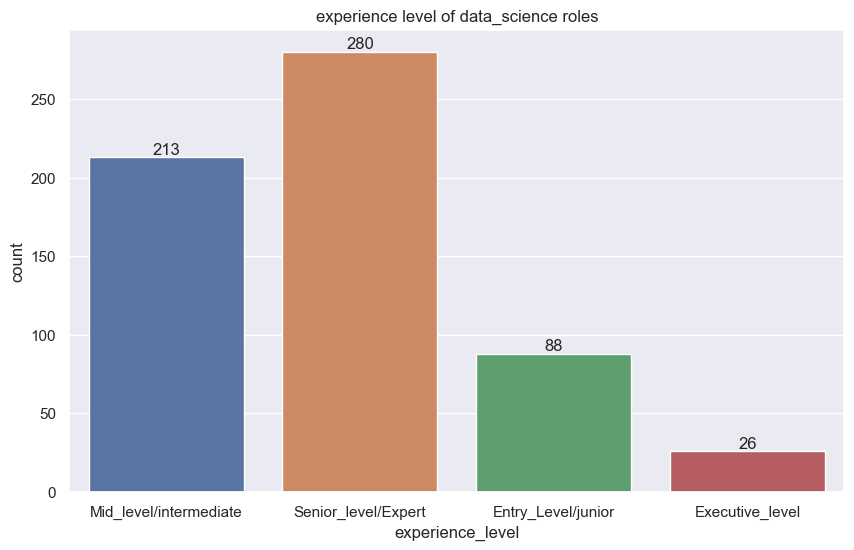

In [136]:
plt.figure(figsize=(10,6))
ax = sns.countplot(data=ds_salaries,x='experience_level')
plt.title('experience level of data_science roles')


for i in ax.containers:
    ax.bar_label(i)

plt.show()

In [137]:
ds_salaries.head()

,job_title,employee_residence,work_year,experience_level,employment_type,salary,salary_currency,salary_in_usd,remote_ratio,company_location,company_size
0,Data Scientist,DE,2020,Mid_level/intermediate,FT,70000,EUR,79833,0,DE,L
1,Machine Learning Scientist,JP,2020,Senior_level/Expert,FT,260000,USD,260000,0,JP,S
2,Big Data Engineer,GB,2020,Senior_level/Expert,FT,85000,GBP,109024,50,GB,M
3,Product Data Analyst,HN,2020,Mid_level/intermediate,FT,20000,USD,20000,0,HN,S
4,Machine Learning Engineer,US,2020,Senior_level/Expert,FT,150000,USD,150000,50,US,L


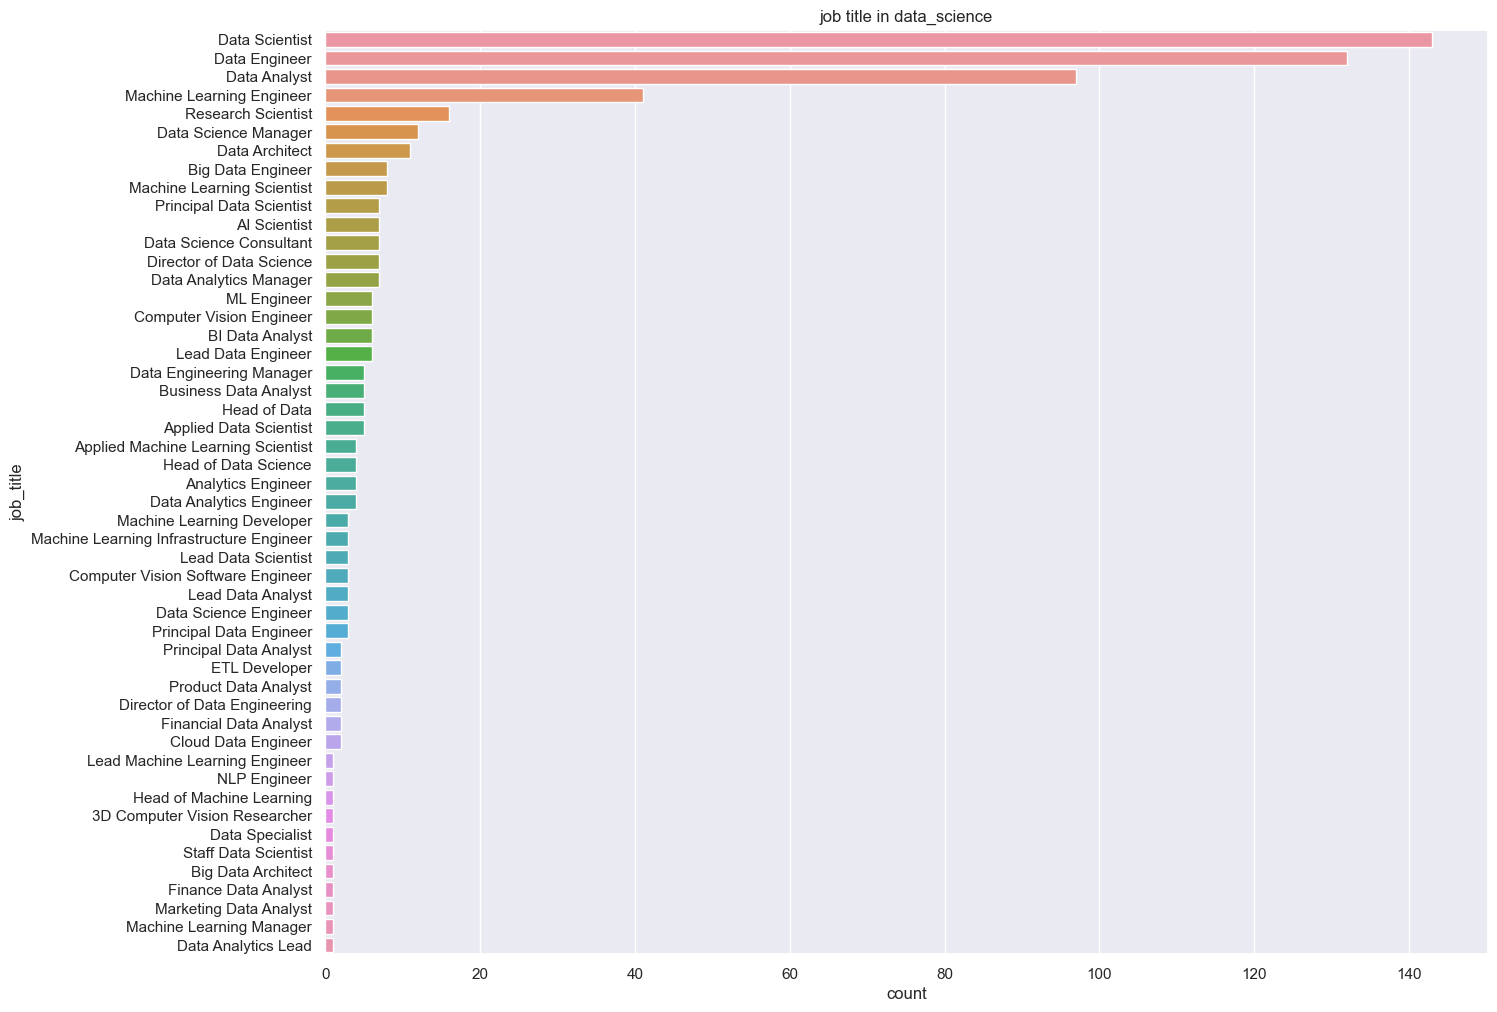

In [138]:
#job titles in data-science
order = ds_salaries['job_title'].value_counts().index
plt.figure(figsize=(15,12))
sns.countplot(y='job_title',data=ds_salaries,order=order)
plt.title('job title in data_science')
plt.show()

(-0.5, 2999.5, 1999.5, -0.5)

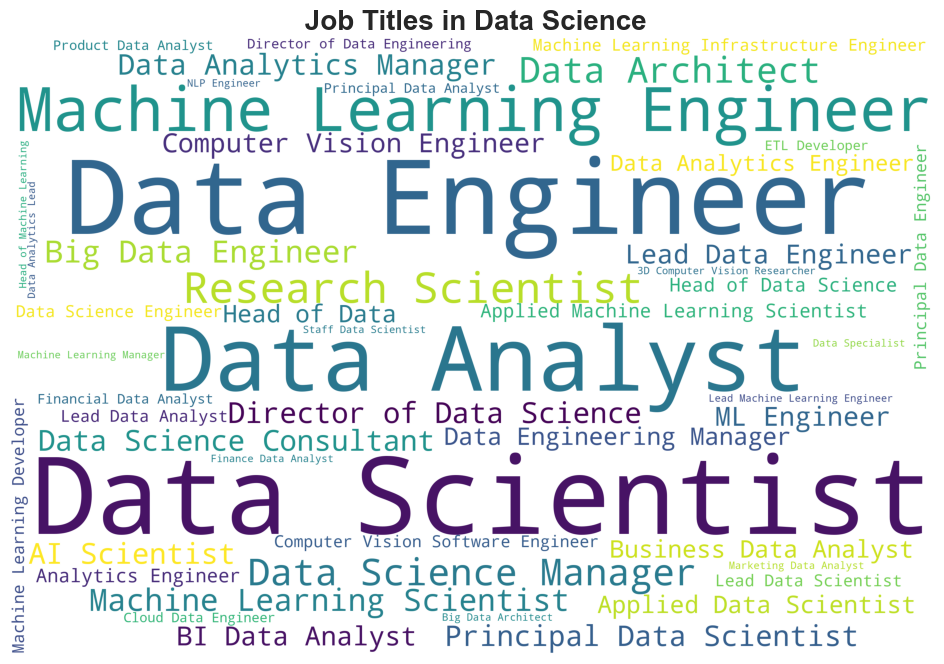

In [139]:
from wordcloud import WordCloud, STOPWORDS

#Create text variable
from collections import Counter
word_cloud_list=Counter(ds_salaries.job_title)

#Generate Word Cloud
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    #random_state=1,
    background_color="white",
    #colormap="Set2",
    collocations= False,
    stopwords=STOPWORDS,
).generate_from_frequencies(word_cloud_list)

# Display the generated word cloud
plt.figure(figsize=(15,8))
plt.title(' Job Titles in Data Science', fontsize=20, fontweight='bold')
plt.imshow(wordcloud)
plt.axis("off")

In [140]:
mymap = {'FT':'Full-Time','PT':'Part-Time','CT':'Contract-Type','FL':'Freelance'}
ds_salaries['employment_type'] = ds_salaries['employment_type'].map(mymap)


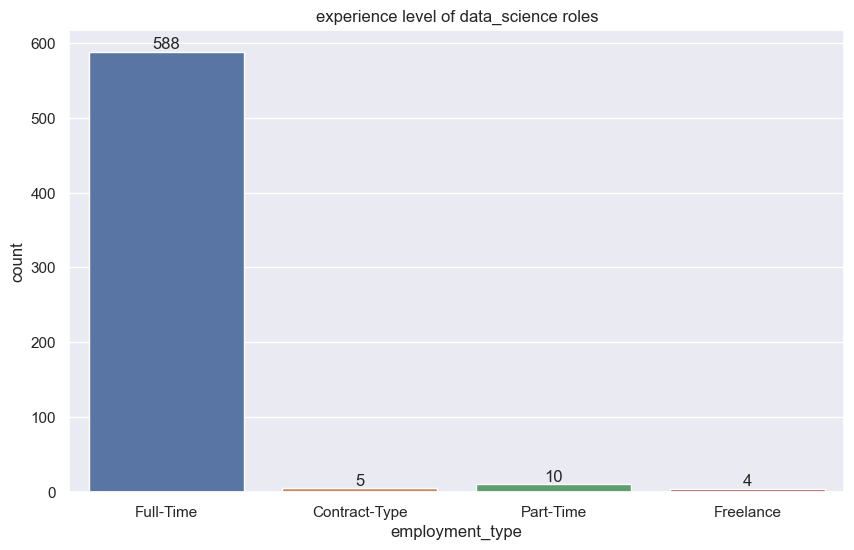

In [141]:
plt.figure(figsize=(10,6))
ax = sns.countplot(data=ds_salaries,x='employment_type')
plt.title('experience level of data_science roles')


for i in ax.containers:
    ax.bar_label(i)

plt.show()

In [142]:
# the 10th highest earners across countries

ds_salaries.nlargest(10,'salary_in_usd') [['job_title','salary_currency','salary','salary_in_usd']]


#most top 10 salaries come from usa

,job_title,salary_currency,salary,salary_in_usd
252,Principal Data Engineer,USD,600000,600000
33,Research Scientist,USD,450000,450000
97,Financial Data Analyst,USD,450000,450000
157,Applied Machine Learning Scientist,USD,423000,423000
225,Principal Data Scientist,USD,416000,416000
63,Data Scientist,USD,412000,412000
523,Data Analytics Lead,USD,405000,405000
519,Applied Data Scientist,USD,380000,380000
25,Director of Data Science,USD,325000,325000
482,Data Engineer,USD,324000,324000


In [143]:
# the 10 lowest earners across countries

ds_salaries.nsmallest(10,'salary') [['job_title','salary_currency','salary','salary_in_usd']]

,job_title,salary_currency,salary,salary_in_usd
185,Data Engineer,USD,4000,4000
238,Data Scientist,USD,4000,4000
15,Data Analyst,USD,8000,8000
124,Data Analyst,EUR,8760,10354
196,BI Data Analyst,USD,9272,9272
38,Data Analyst,USD,10000,10000
521,Computer Vision Engineer,USD,10000,10000
96,AI Scientist,USD,12000,12000
113,AI Scientist,USD,12000,12000
184,Machine Learning Scientist,USD,12000,12000


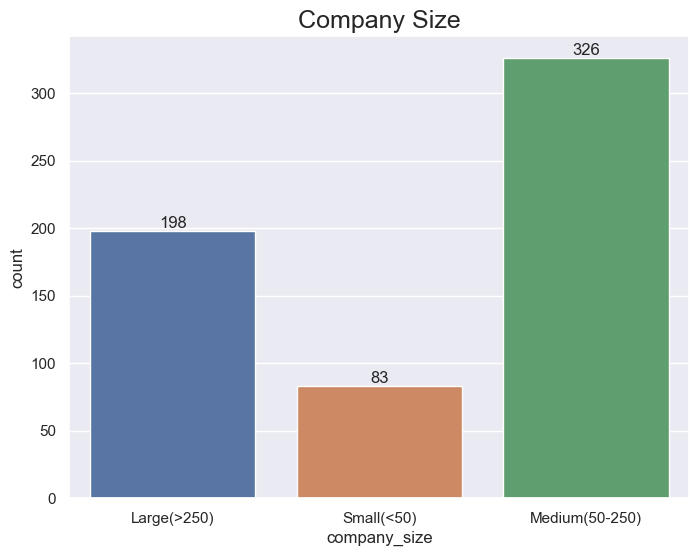

In [144]:
#count by company size

ds_salaries['company_size'].replace({'S':'Small(<50)','M':'Medium(50-250)','L':'Large(>250)'}, inplace=True)
plt.figure(figsize=(8,6))
plt.title('Company Size', fontsize=18)
ax = sns.countplot (x='company_size', data=ds_salaries)
for i in ax.containers:
    ax.bar_label(i)
plt.show()

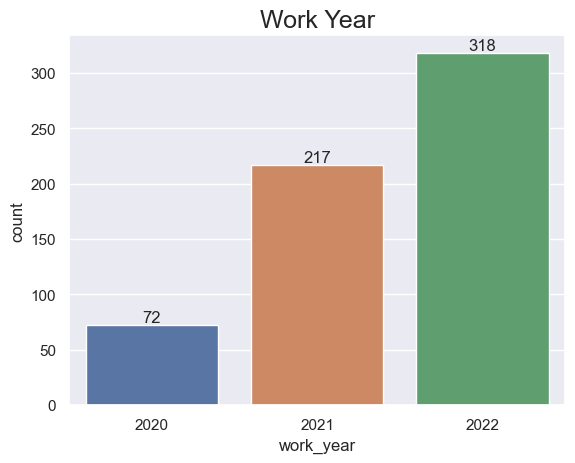

In [145]:
plt.title ('Work Year', fontsize=18)
ax = sns.countplot(x='work_year', data=ds_salaries)
for i in ax.containers:
    ax.bar_label(i)
plt.show()    

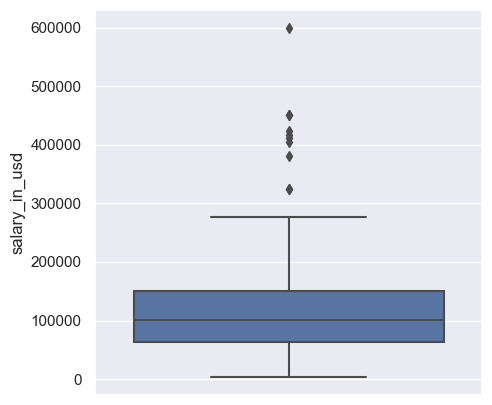

In [146]:
#salaries distribution
plt.figure(figsize=(5,5))
sns.boxplot(y='salary_in_usd', data=ds_salaries)
plt.show()

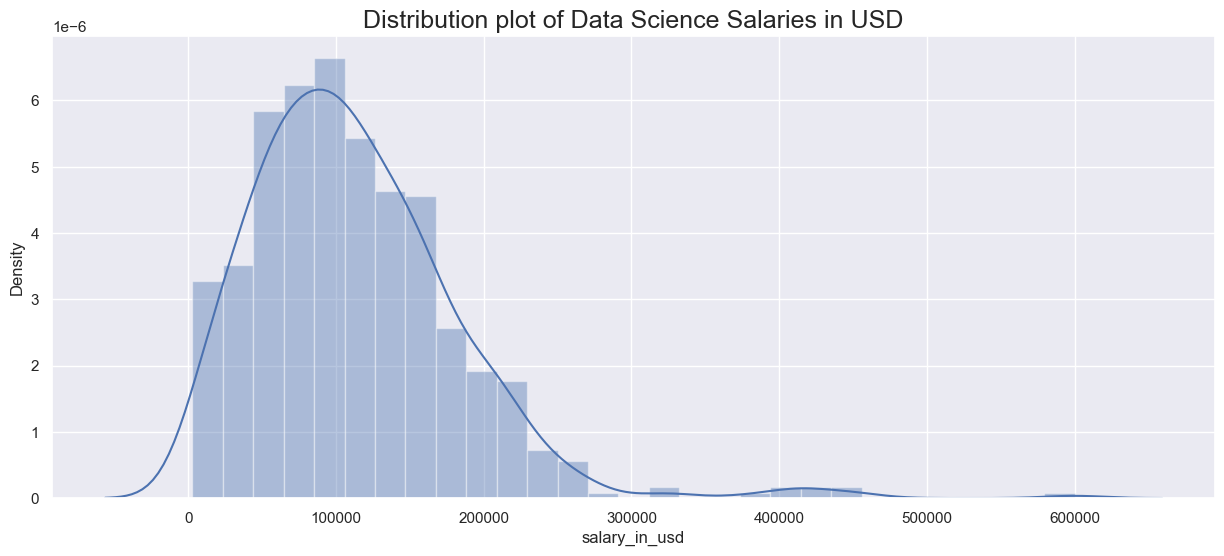

In [147]:
plt.figure(figsize=(15,6))
sns.distplot(ds_salaries['salary_in_usd'])
plt.title('Distribution plot of Data Science Salaries in USD', fontsize=18)
plt.show()

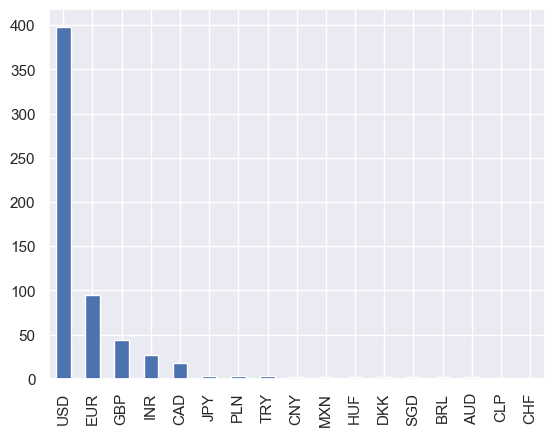

In [148]:
# count of salary curreny at the place of work

ds_salaries['salary_currency'].value_counts().plot(kind='bar')
plt.show()

In [149]:
ds_salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   job_title           607 non-null    object
 1   employee_residence  607 non-null    object
 2   work_year           607 non-null    int64 
 3   experience_level    607 non-null    object
 4   employment_type     607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 52.3+ KB


In [150]:
ds_salaries['remote_ratio'].unique()
#ds_salaries['remote_ratio'].astype('str')

array([  0,  50, 100], dtype=int64)

In [151]:
my_map= {0:'no_remote',50:'partially_remote',100:'fully_remote'}

ds_salaries['remote_ratio'].map(my_map).astype('category')

0             no_remote
1             no_remote
2      partially_remote
3             no_remote
4      partially_remote
             ...       
602        fully_remote
603        fully_remote
604           no_remote
605        fully_remote
606        fully_remote
Name: remote_ratio, Length: 607, dtype: category
Categories (3, object): ['fully_remote', 'no_remote', 'partially_remote']

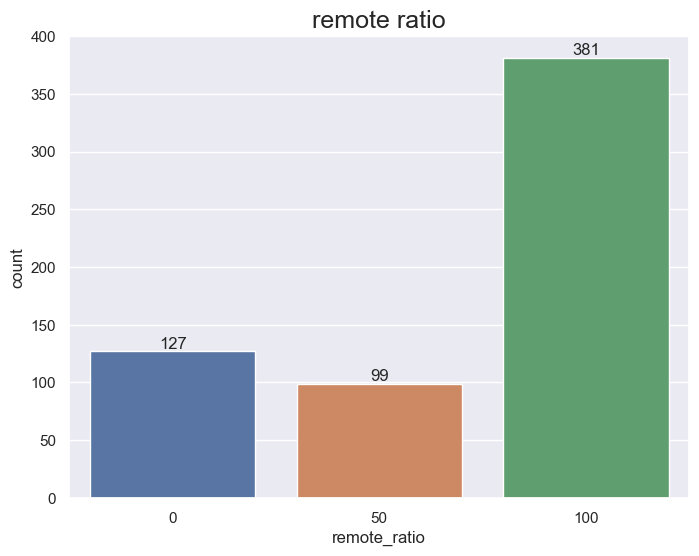

In [152]:

plt.figure(figsize=(8,6))
plt.title('remote ratio', fontsize=18)
ax = sns.countplot (x='remote_ratio', data=ds_salaries)
for i in ax.containers:
    ax.bar_label(i)
plt.show()

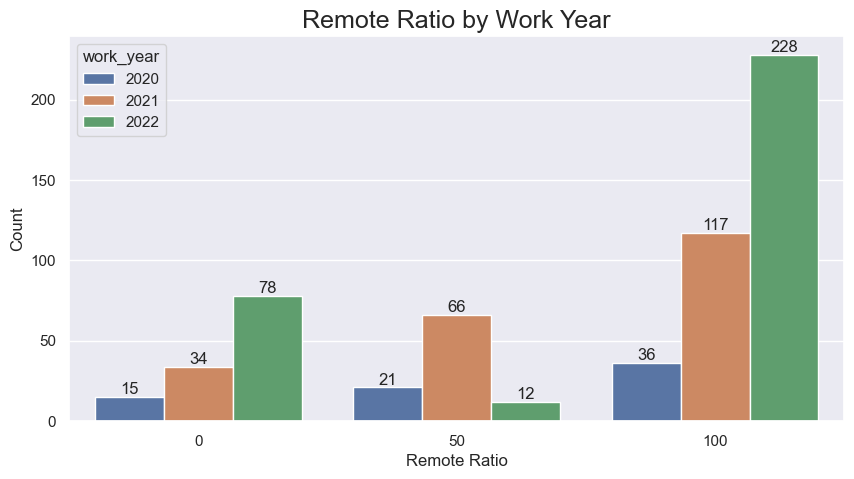

In [153]:
#remote ration by work year

plt.figure(figsize=(10,5))
plt.title("Remote Ratio by Work Year", fontsize=18)
ax = sns.countplot(x='remote_ratio', data=ds_salaries, hue = 'work_year')
for i in ax.containers:
    ax.bar_label(i)
plt.xlabel("Remote Ratio")
plt.ylabel("Count")
plt.show()


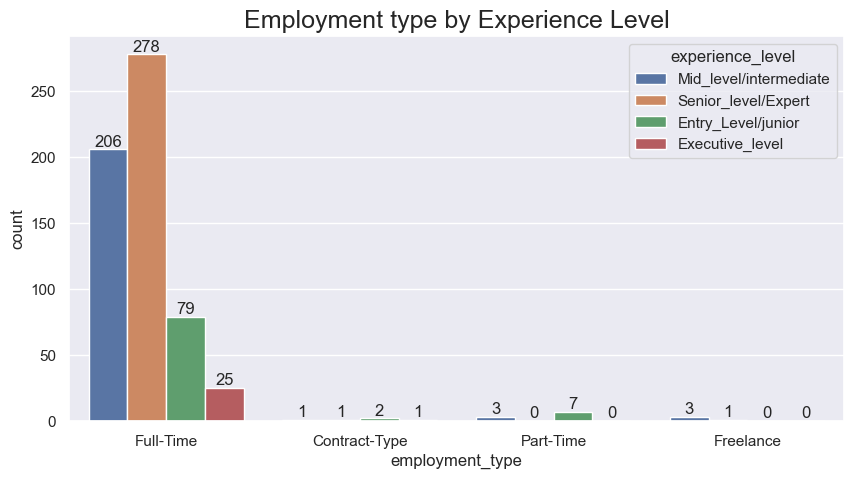

In [154]:
#employment type by experience level
plt.figure(figsize=(10,5))
plt.title('Employment type by Experience Level', fontsize=18)
ax=sns.countplot(x='employment_type', data=ds_salaries, hue = 'experience_level')
for i in ax.containers:
    ax.bar_label(i)

In [155]:
#company sze by experience level
data = ds_salaries['experience_level'].value_counts()
pd.DataFrame(index=ds_salaries['company_size'].unique(),columns=ds_salaries['experience_level'].unique(),data=data)

,Mid_level/intermediate,Senior_level/Expert,Entry_Level/junior,Executive_level
Large(>250),NaN,NaN,NaN,NaN
Small(<50),NaN,NaN,NaN,NaN
Medium(50-250),NaN,NaN,NaN,NaN


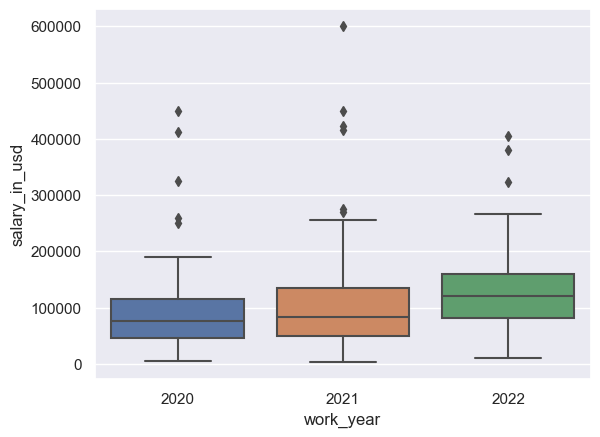

In [156]:
#salary by work year
sns.boxplot(x='work_year',y='salary_in_usd', data=ds_salaries)
plt.show()

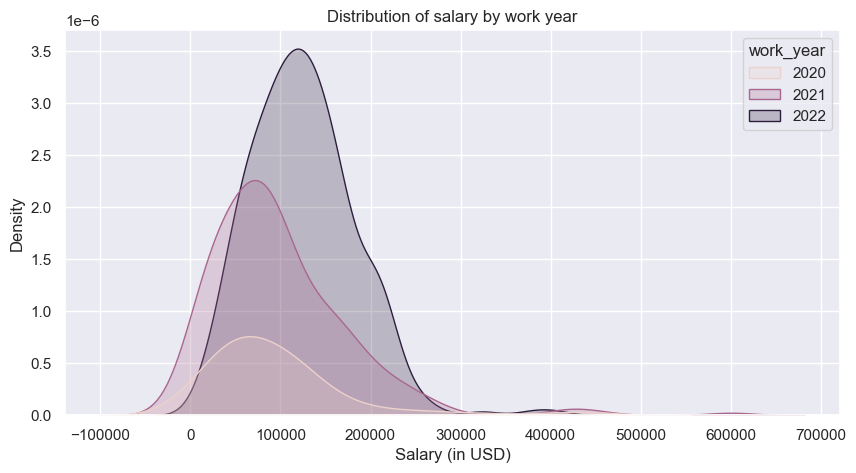

In [157]:
#distribution of salary
plt.figure(figsize=(10,5))
sns.kdeplot(data=ds_salaries, x='salary_in_usd', hue='work_year', fill=True)
plt.title("Distribution of salary by work year")
plt.xlabel("Salary (in USD)")
plt.ylabel("Density")
plt.show()

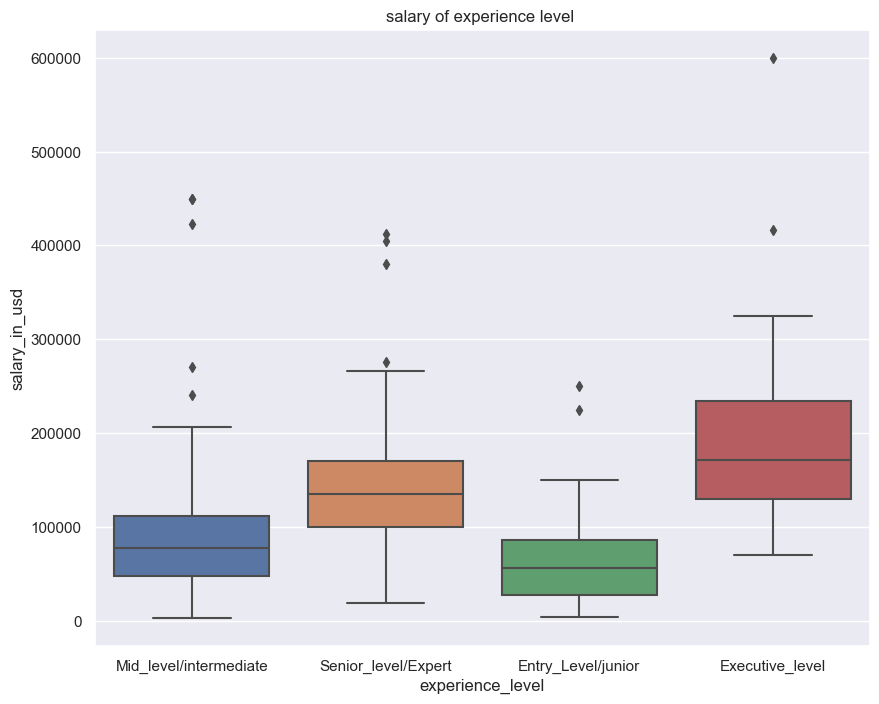

In [158]:
# experience level by salary
plt.figure(figsize=(10,8))
sns.boxplot(x='experience_level',y='salary_in_usd', data=ds_salaries)
plt.title('salary of experience level ')
plt.show()

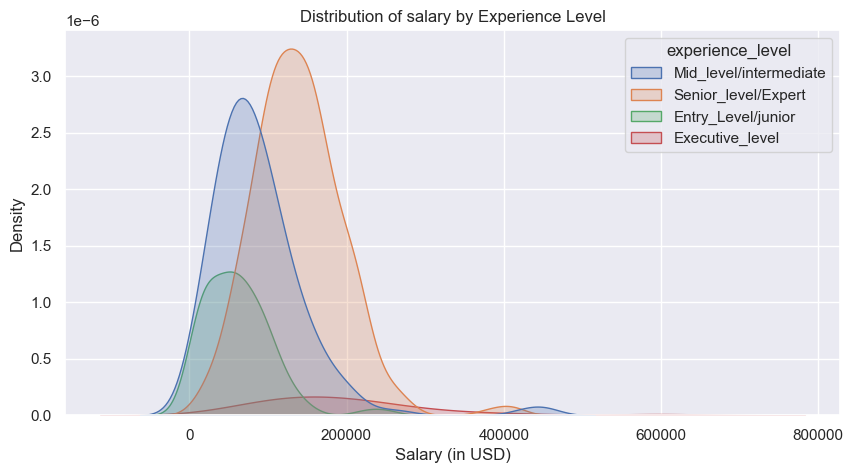

In [159]:
#distribution of salaries by experience_level
plt.figure(figsize=(10,5))
sns.kdeplot(data=ds_salaries, x='salary_in_usd', hue='experience_level', fill=True)
plt.title("Distribution of salary by Experience Level")
plt.xlabel("Salary (in USD)")
plt.ylabel("Density")

plt.show()

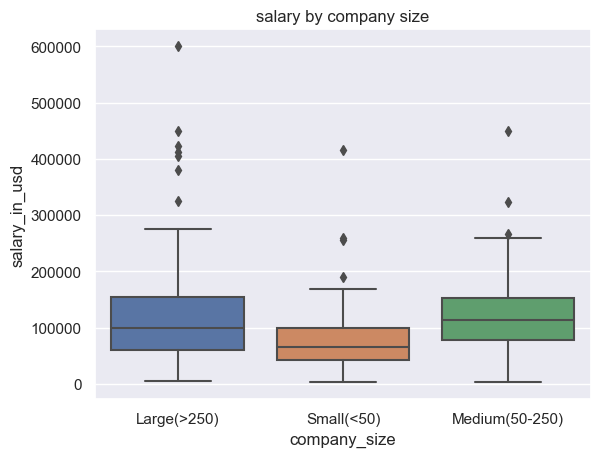

In [160]:
#salary by company size

sns.boxplot(x='company_size',y='salary_in_usd', data=ds_salaries)
plt.title('salary by company size')
plt.show()

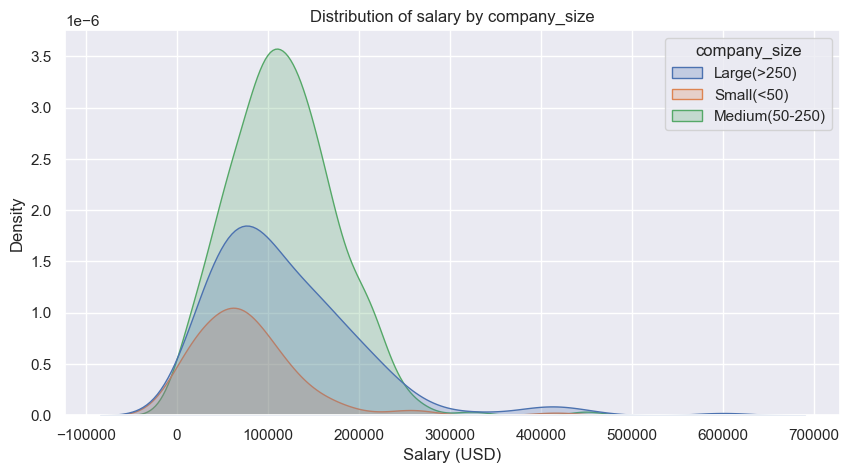

In [161]:
#distribution of salaries by experience_level
plt.figure(figsize=(10,5))
sns.kdeplot(data=ds_salaries, x='salary_in_usd', hue='company_size', fill=True)
plt.title("Distribution of salary by company_size")
plt.xlabel("Salary (USD)")
plt.ylabel("Density")

plt.show()

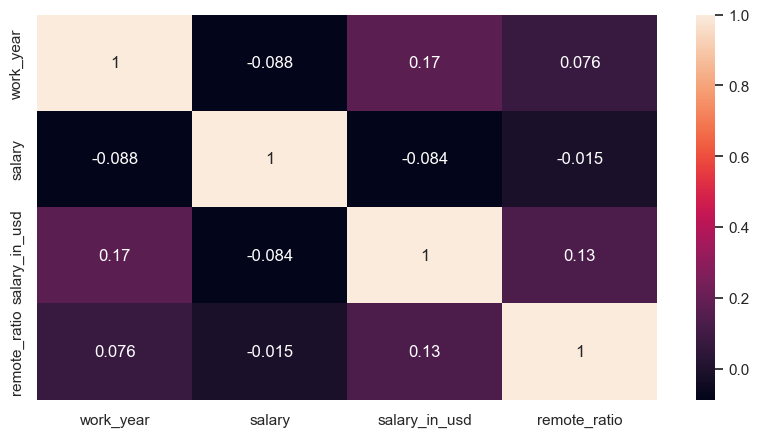

In [162]:
plt.figure(figsize=(10,5))
sns.heatmap(ds_salaries.corr(),annot=True)
plt.show()

Text(0, 0.5, 'salaries in usd($)')

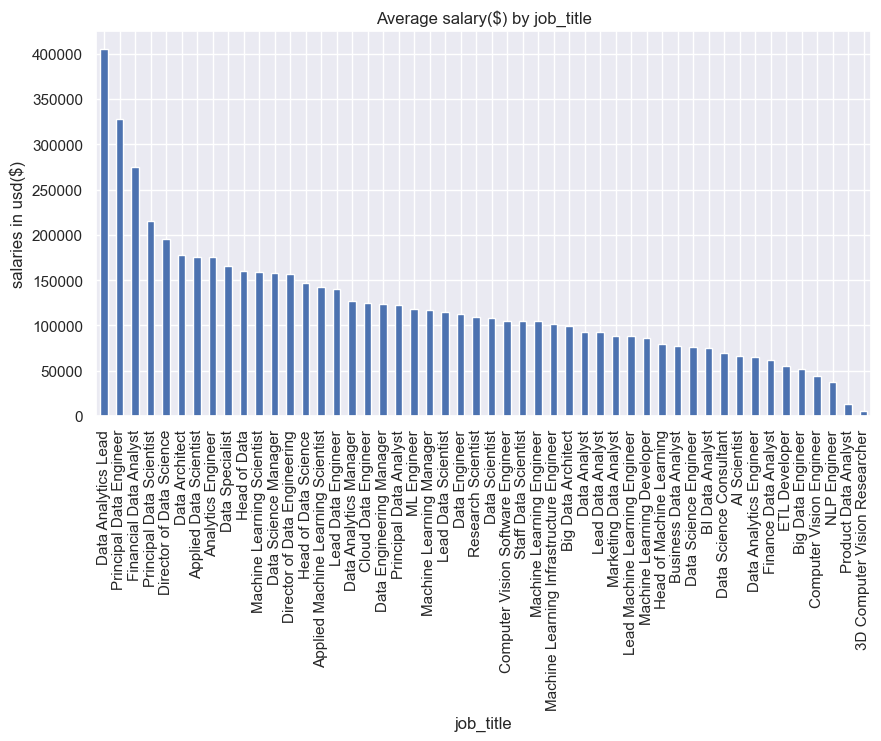

In [163]:
#average salary by job_title
ax = ds_salaries.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False) \
            .plot(kind='bar',figsize=(10,5),title='Average salary($) by job_title')
ax.set_ylabel('salaries in usd($)')
        

Text(0, 0.5, 'salaries in usd($)')

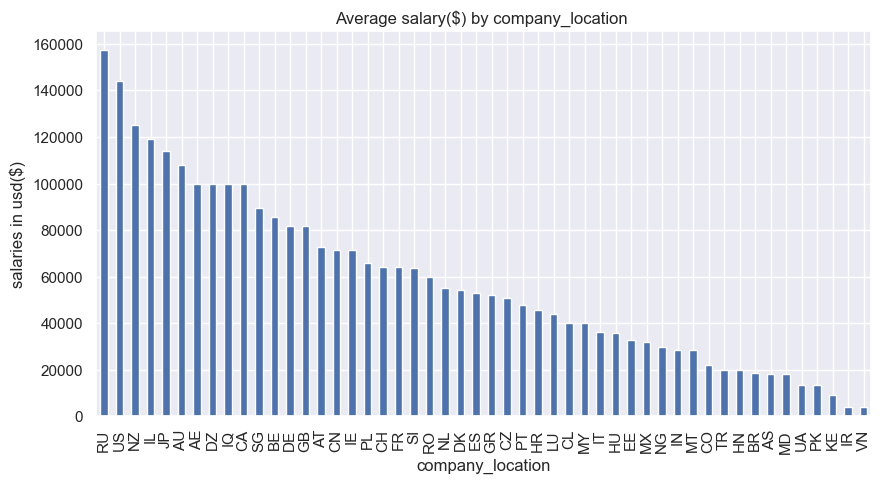

In [167]:
#average salary by job_location
ax = ds_salaries.groupby('company_location')['salary_in_usd'].mean().sort_values(ascending=False) \
            .plot(kind='bar',figsize=(10,5),title='Average salary($) by company_location ')
ax.set_ylabel('salaries in usd($)')        

In [165]:
ds_salaries.to_csv('data science salaries')